# <FONT COLOR = "red">***LOAD AND EXPLORE DATA***</FONT>
---
---

This notebook is a practical excersie proposed in the support material of the Artificial Intelligence (AI) Talento Tech's Bootcamp.

The main objective is load and explore any dataset.

In [1]:
# IMPORT COMMON LIBRARIES
import pandas as pd
import numpy as np

# IMPORT LIBRARIES TO CREATE PICTURES
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import io
import base64

# IMPORT LIBRARIES TO MANAGE DIRECTORY
import os

# IMPORT LIBRARIES TO DISPLAY IMAGES ON THE DATAFRAME
from IPython.display import HTML

# IMPORT LOAD_DIGITS DATASET
from sklearn.datasets import load_digits

In [2]:
# LOAD THE LOAD_DIGITS DATASET
digits = load_digits()
X = digits.data
y = digits.target

# PRESENT X AND Y DATA
print(X)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [3]:
# SHAPE OF X AND Y
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

# Y UNIQUE VALUES
print(f'Unique values in y: {np.unique(y)}')

Shape of X: (1797, 64)
Shape of y: (1797,)
Unique values in y: [0 1 2 3 4 5 6 7 8 9]


The $y$ array is allocated to identify the number from 0 to 9 since the $X$ array is assigned the image's pixels, allowing the picture to be created.

In [4]:
# CREATE PICTURES
for i in range(len(X)):
  # RESHAPE IMAGE TO A 8X8 MATRIX
  image = X[i].reshape(8,8)

  # CREATE FIGURE
  plt.figure(figsize=(1,1))
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  plt.axis('off')

  # SAVE PICTURES
  plt.savefig(f'imagen_{y[i]}_{i}.png')
  plt.close()

print("Images generated and saved successfully.")

Images generated and saved successfully.


In [6]:
# OBTAIN THE CREATED PIRCTURES
image_dir = '.'
image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]

# LIST TO SAVE THE IMAGES AND THE LABELS
images = []
labels = []

# SAVE THE IMAGES AND LABELS
for file in image_files:
  # OPEN IMAGE
  image = Image.open(os.path.join(image_dir, file)).convert('L')

  # TRANSFORM IMAGE ON NUMPY ARRAY
  image_array = np.array(image)

  # EXTRACT LABEL FROM FILE NAME
  label = int(file.split('_')[1])

  # SAVE IMAGE AND LABEL
  images.append(image_array)
  labels.append(label)

# CREATE PANDAS DATAFRAME
df = pd.DataFrame({'image': images, 'label': labels})
print("Dataset created successfully.")

Dataset created successfully.


In [7]:
# DISPLAY PANDAS DATAFRAME
display(df)

,image,label
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",2
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",9
3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",6
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0
...,...,...
1792,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",6
1793,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",9
1794,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0
1795,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",6


Although the 64 columns were reduced to be able to generate the images found in the Google Colab volatile directory, it is not possible to facilitate the visualization of the data within the dataframe created. Therefore, the following corresponds to allowing the "image" column to present the previously created image.

In [19]:
# FUNCTION TO RECREATE THE DF DATRAFRAME
def image_formatter(image_array:np.ndarray) -> str:
  # TRANSFORM NUMPY ARRAY TO PIL.IMAGE.IMAGE
  image = Image.fromarray(image_array)

  with io.BytesIO() as buffer:
    # SAVE PICTURE AS PNG
    image.save(buffer, format='PNG')
    image_data = buffer.getvalue()
    # EMBED THE IMAGE AS BASE64 ENCODED HTML
    return f'<img src="data:image/png;base64,{base64.b64encode(image_data).decode()}" width="50" height="50">'

# CREATE A NEW VERSION OF DF DATAFRAME
df['image_html'] = df['image'].apply(lambda x: image_formatter(x))
print("Dataframe created successfully.")

Dataframe created successfully.


,image_html,label
0,,0
1,,2
2,,9
3,,6
4,,0
5,,9
6,,4
7,,1
8,,4
9,,9

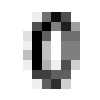
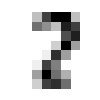
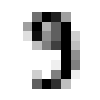
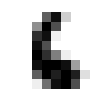
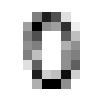
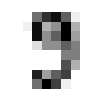
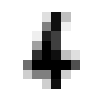
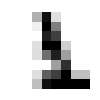
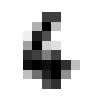
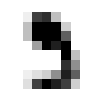
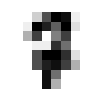
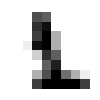
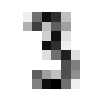
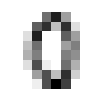
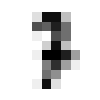
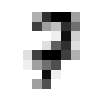
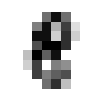
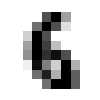
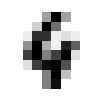
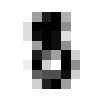
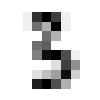
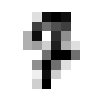
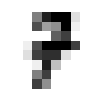
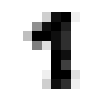
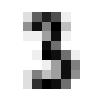
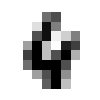
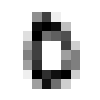
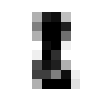
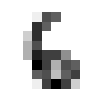
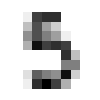
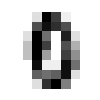
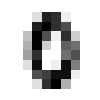
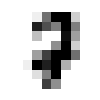
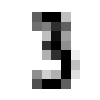
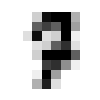
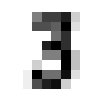
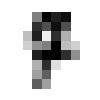
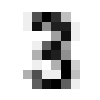
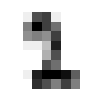
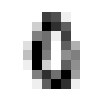
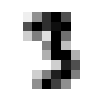
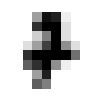
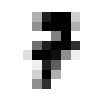
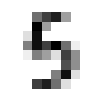
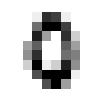
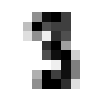
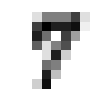
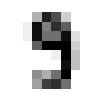
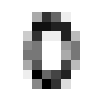
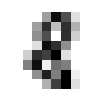
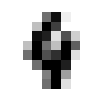
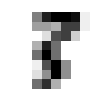
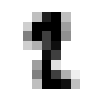
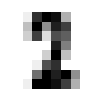
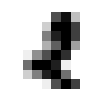
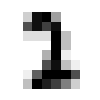
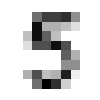
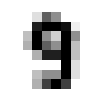
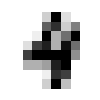
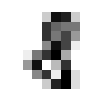
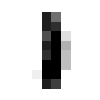
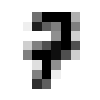
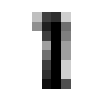
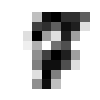
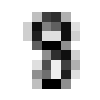
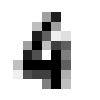
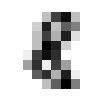
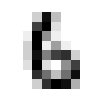
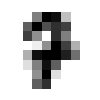
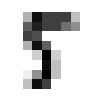
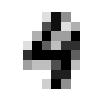
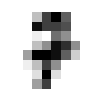
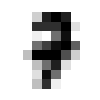
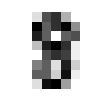
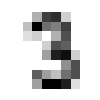
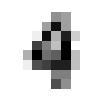
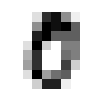
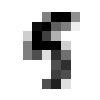
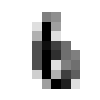
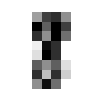
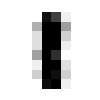
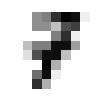
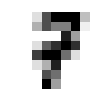
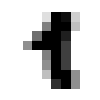
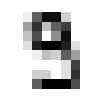
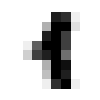
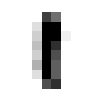
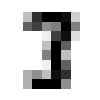
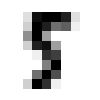
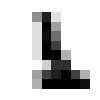
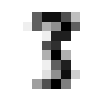
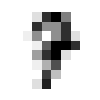
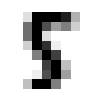
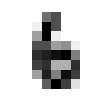
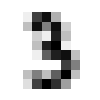
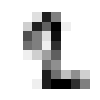
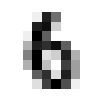
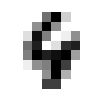
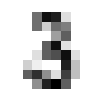
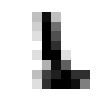
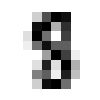
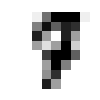
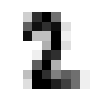
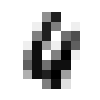
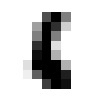
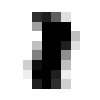
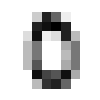
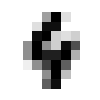
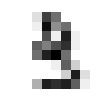
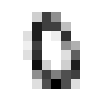
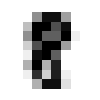
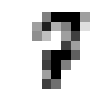
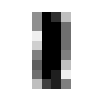
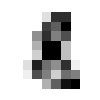
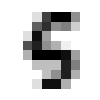
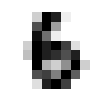
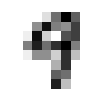
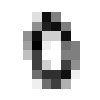
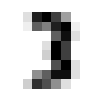
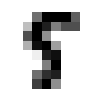
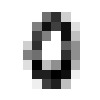
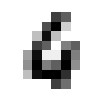
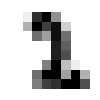
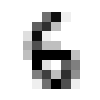
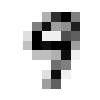
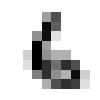
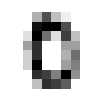
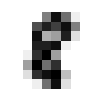
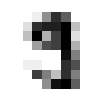
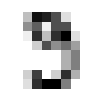
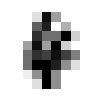
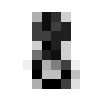
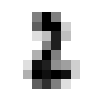
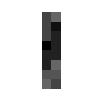
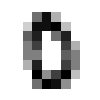
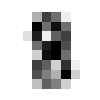
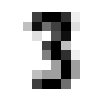
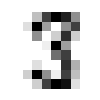
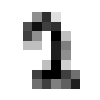
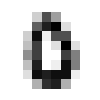
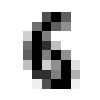
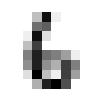
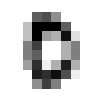
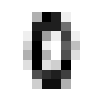
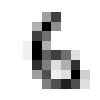
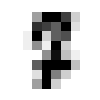
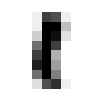
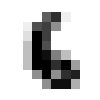
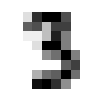
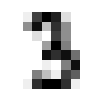
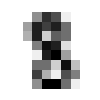
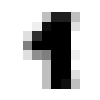
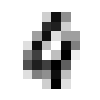
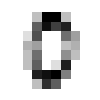
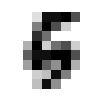
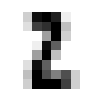
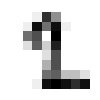
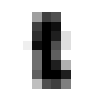
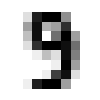
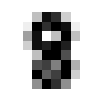
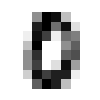
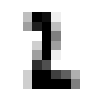
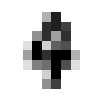
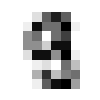
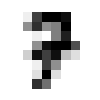
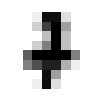
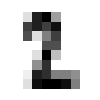
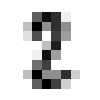
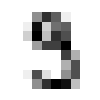
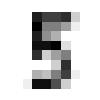
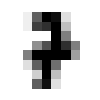
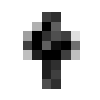
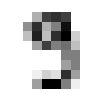
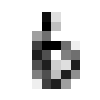
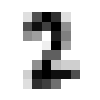
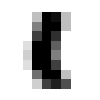
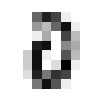
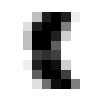
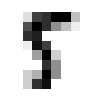
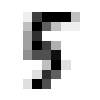
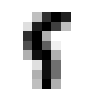
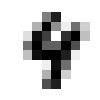
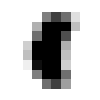
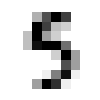
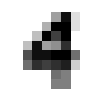
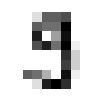
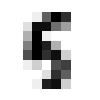
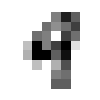
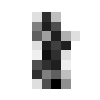
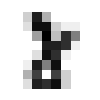
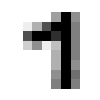
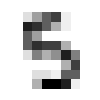
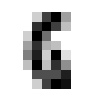
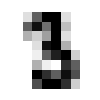
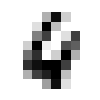
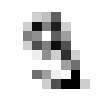
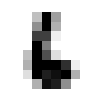
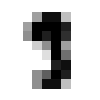
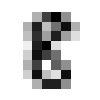
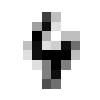
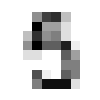
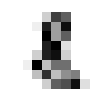
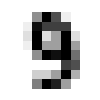
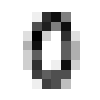
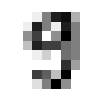
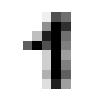
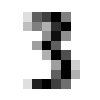
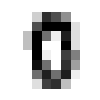
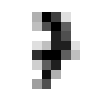
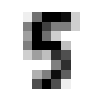
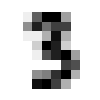
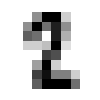
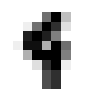
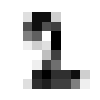
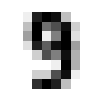
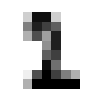
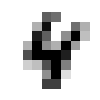
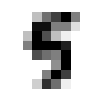
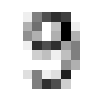
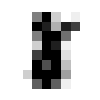
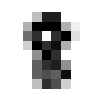
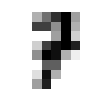
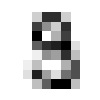
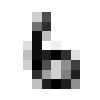
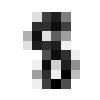
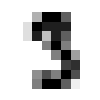
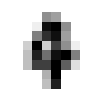
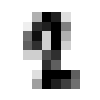
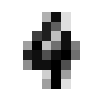
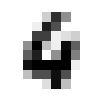
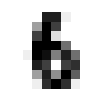
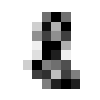
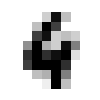
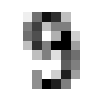
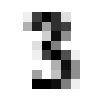
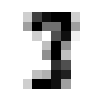
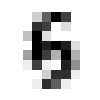
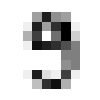
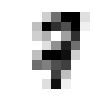
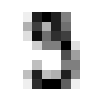
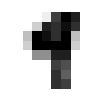
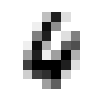
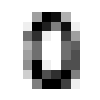
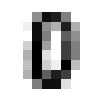
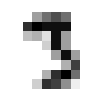
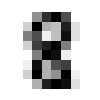
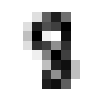
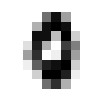
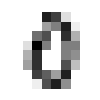
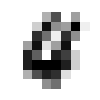
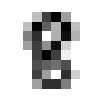
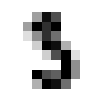
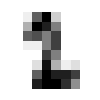
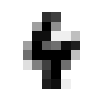
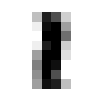
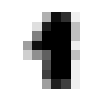
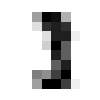
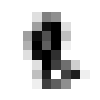
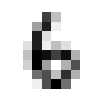
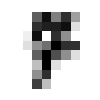
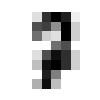
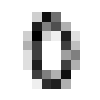
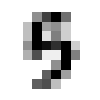
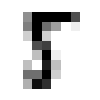
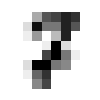
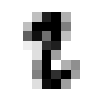
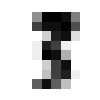
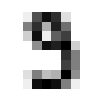
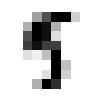
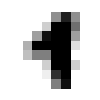
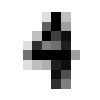
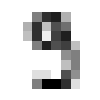
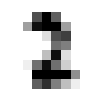
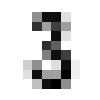
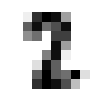
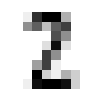
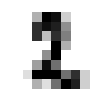
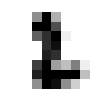
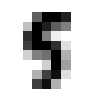
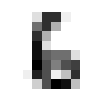
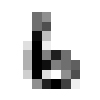
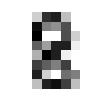
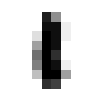
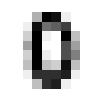
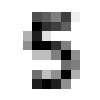
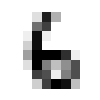
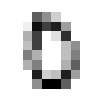
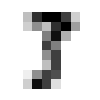
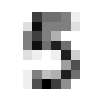
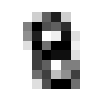
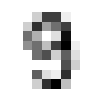
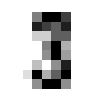
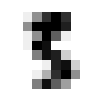
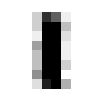
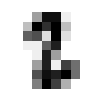
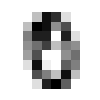
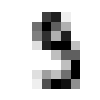
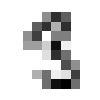
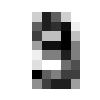
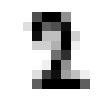
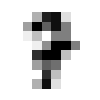
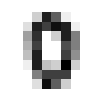
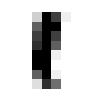
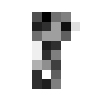
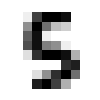
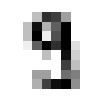
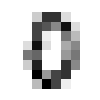
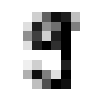
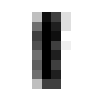
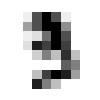
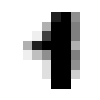
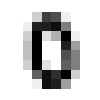
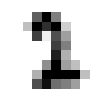
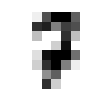
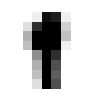
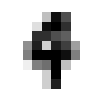
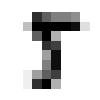
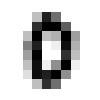
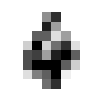
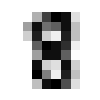
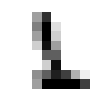
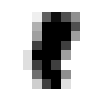
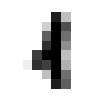
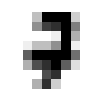
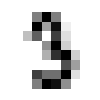
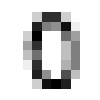
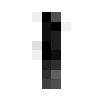
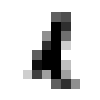
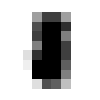
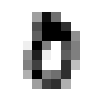
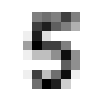
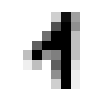
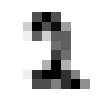
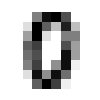
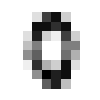
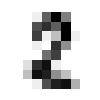
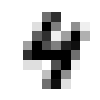
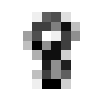
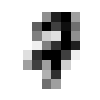
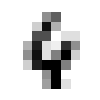
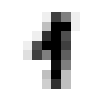
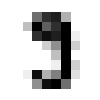
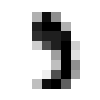
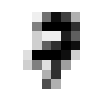
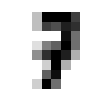
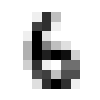
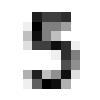
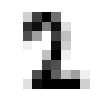
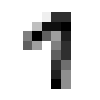
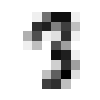
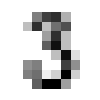
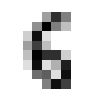
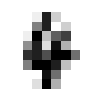
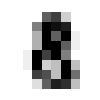
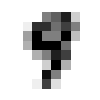
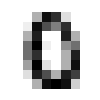
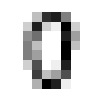
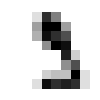
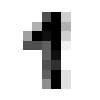
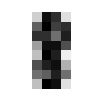
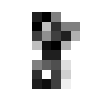
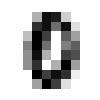
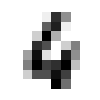
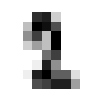
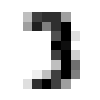
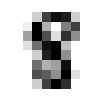
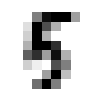
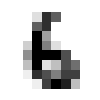
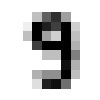
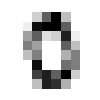
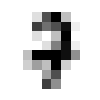
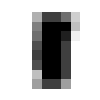
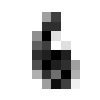
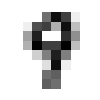
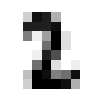
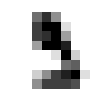
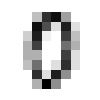
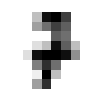
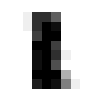
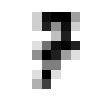
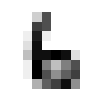
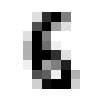
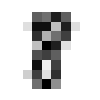
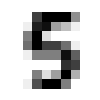
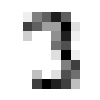
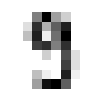
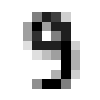
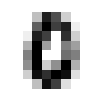
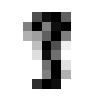
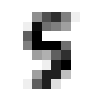
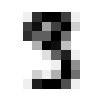
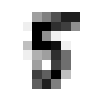
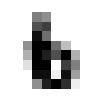
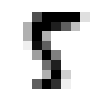
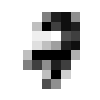
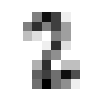
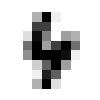
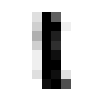
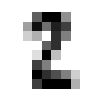
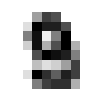
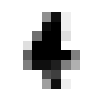
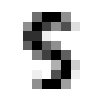
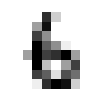
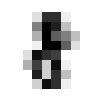
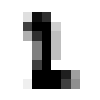
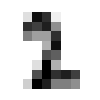
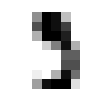
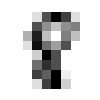
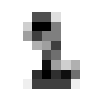
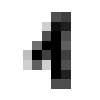
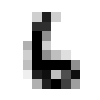
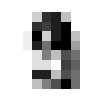
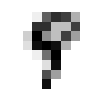
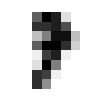
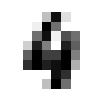
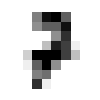
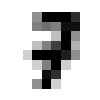
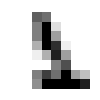
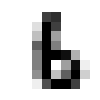
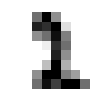
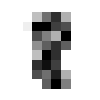
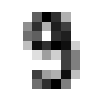
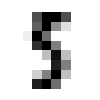
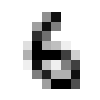
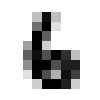
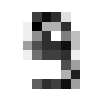
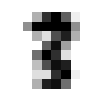
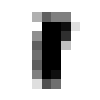
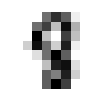
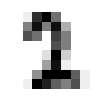
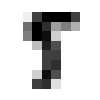
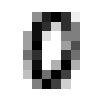
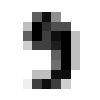
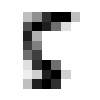
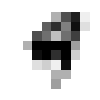
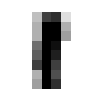
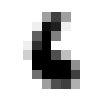
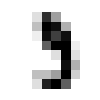
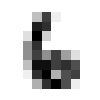
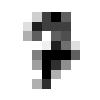
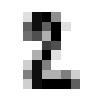
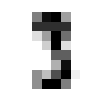
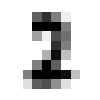
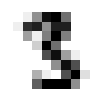
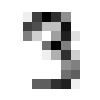
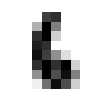
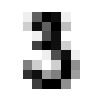
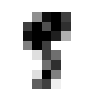
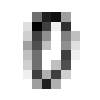
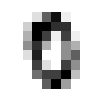
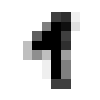
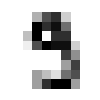
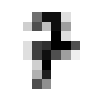
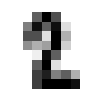
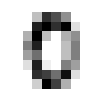
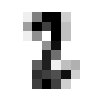
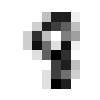
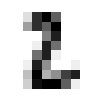
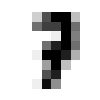
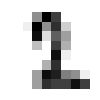
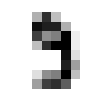
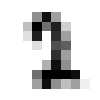
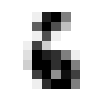
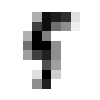
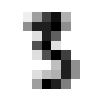
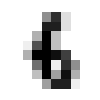
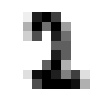
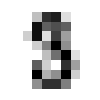
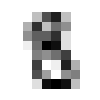
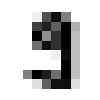
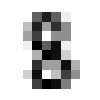
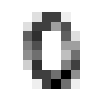
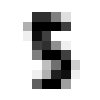
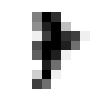
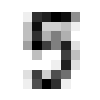
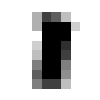
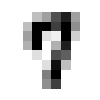
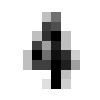
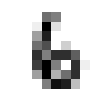
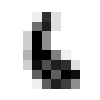
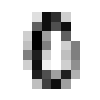
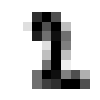
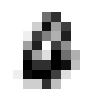
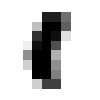
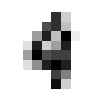
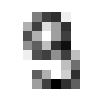
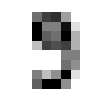
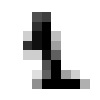
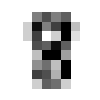
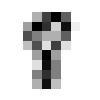
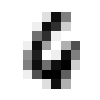
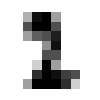
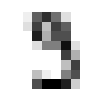
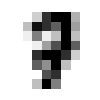
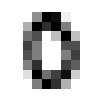
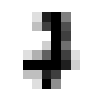
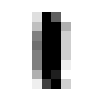
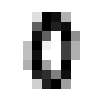
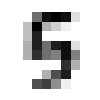
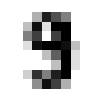
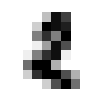
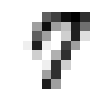
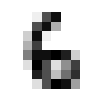
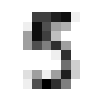
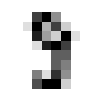
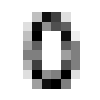
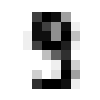
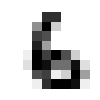
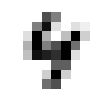
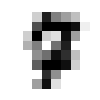
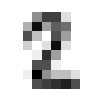
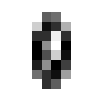
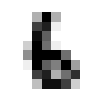
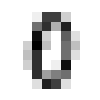
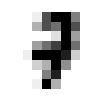
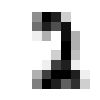
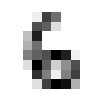
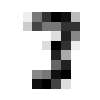
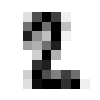
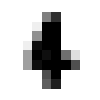
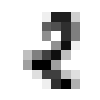
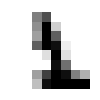
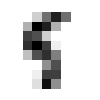
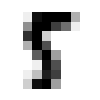
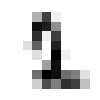
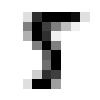
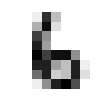
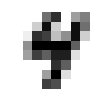
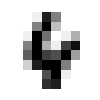
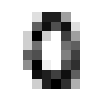
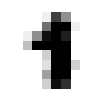
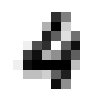
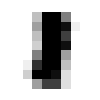
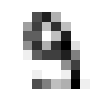
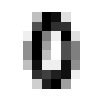
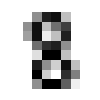
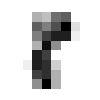
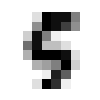
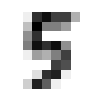
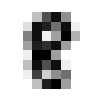
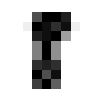
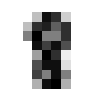
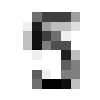
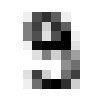
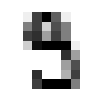
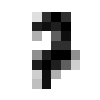
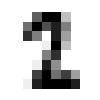
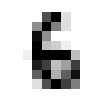
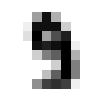
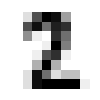
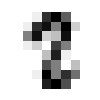
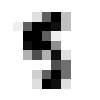
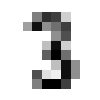
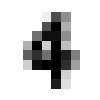
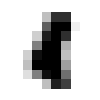
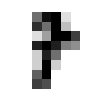
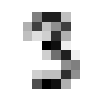
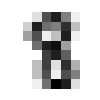
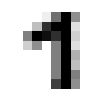
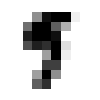
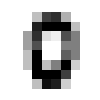
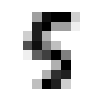
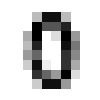
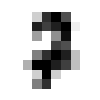
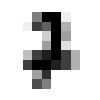
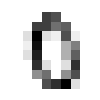
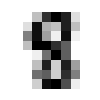
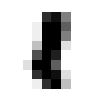
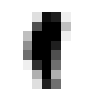
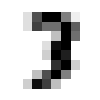
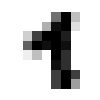
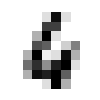
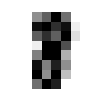
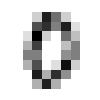
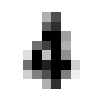
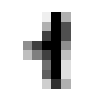
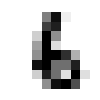
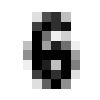
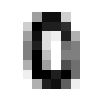
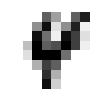
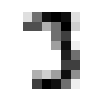
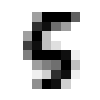
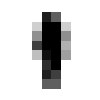
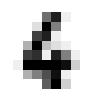
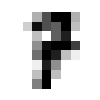
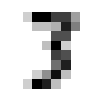
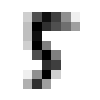
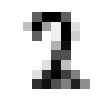
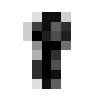
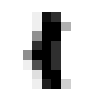
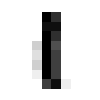
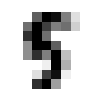
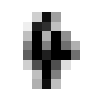
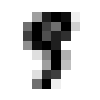
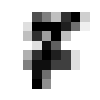
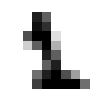
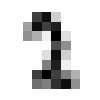
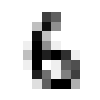
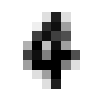
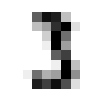
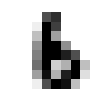
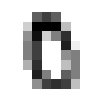
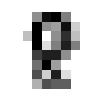
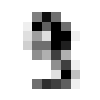
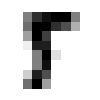
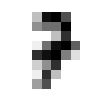
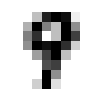
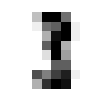
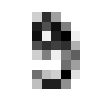
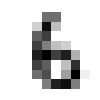
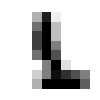
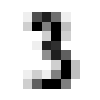
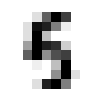
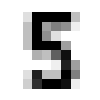
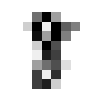
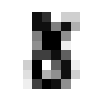
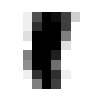
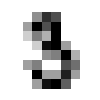
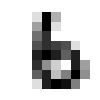
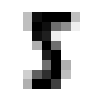
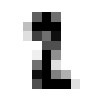
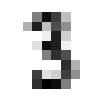
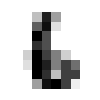
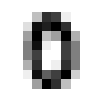
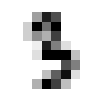
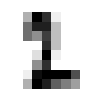
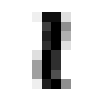
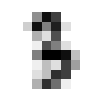
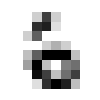
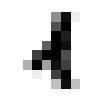
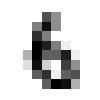
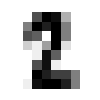
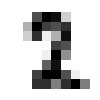
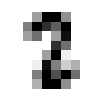
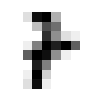
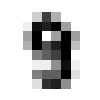
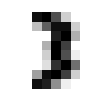
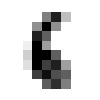
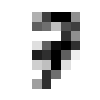
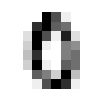
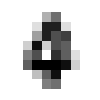
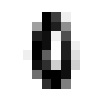
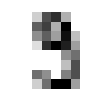
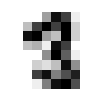
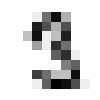
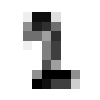
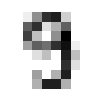
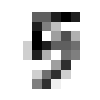
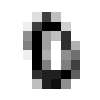
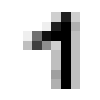
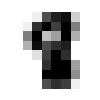
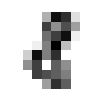
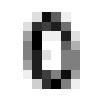
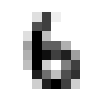
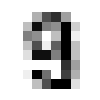
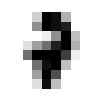
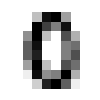
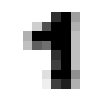
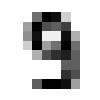
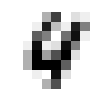
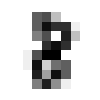
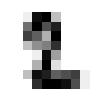
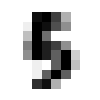
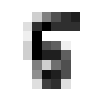
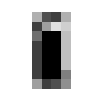
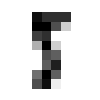
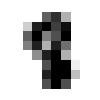
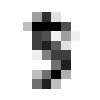
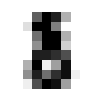
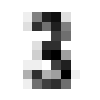
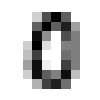
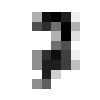
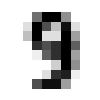
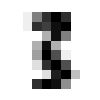
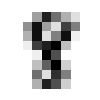
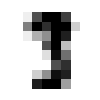
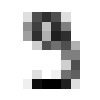
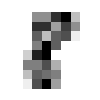
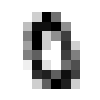
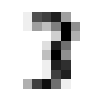
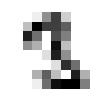
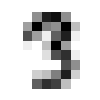
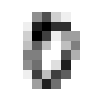
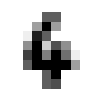
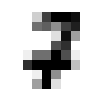
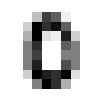
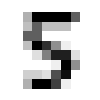
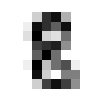
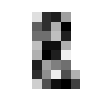
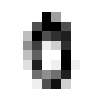
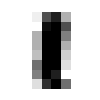
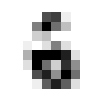
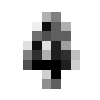
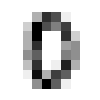
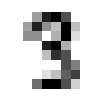
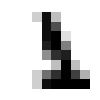
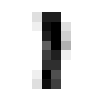
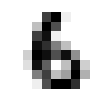
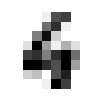
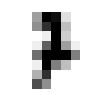
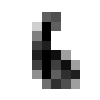
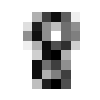
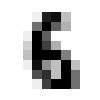
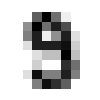
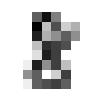
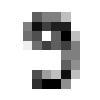
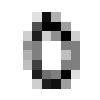
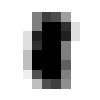
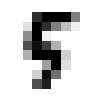
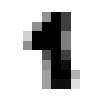
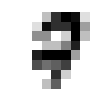
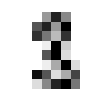
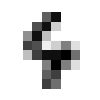
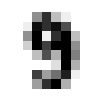
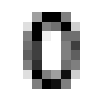
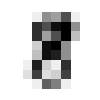
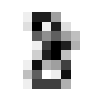
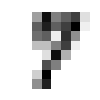
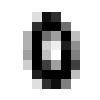
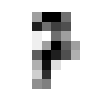
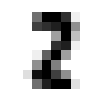
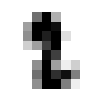
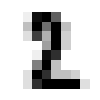
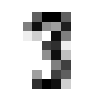
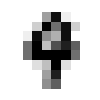
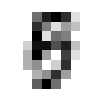
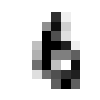
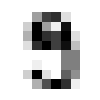
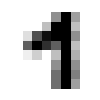
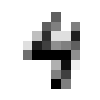
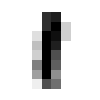
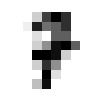
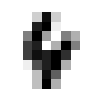
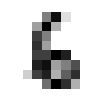
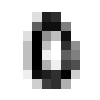
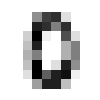
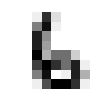
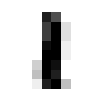
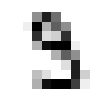
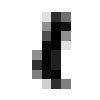
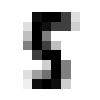
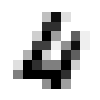
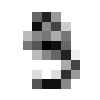
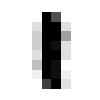
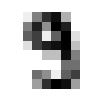
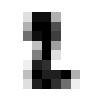
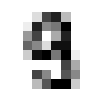
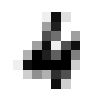
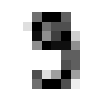
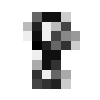
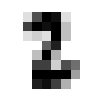
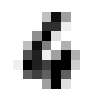
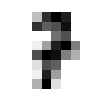
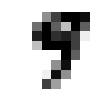
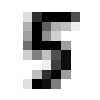
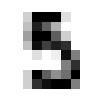
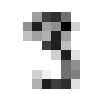
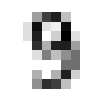
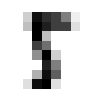
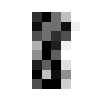
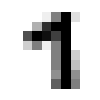
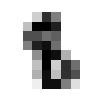
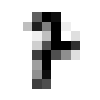
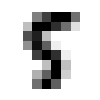
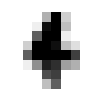
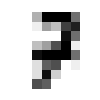
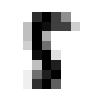
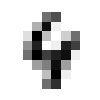
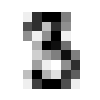
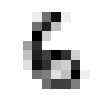
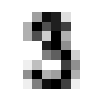
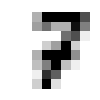
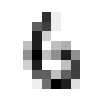
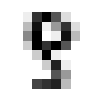
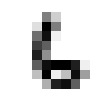
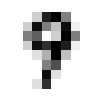
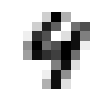
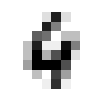
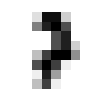
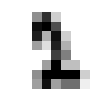
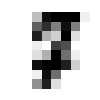
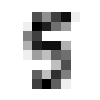
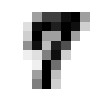
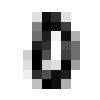
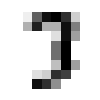
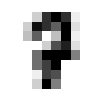
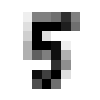
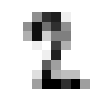
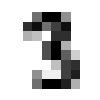
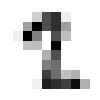
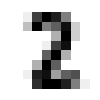
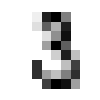
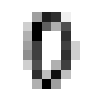
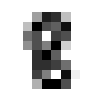
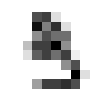
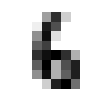
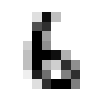
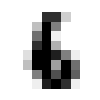
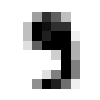
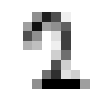
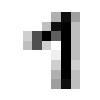
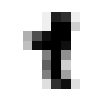
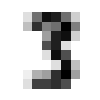
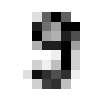
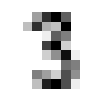
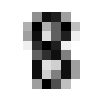
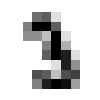
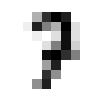
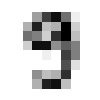
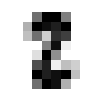
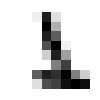
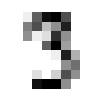
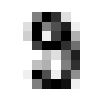
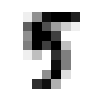
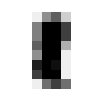
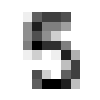
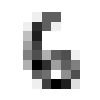
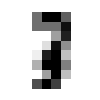
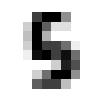
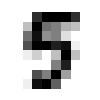
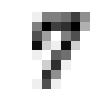
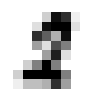
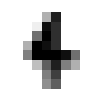
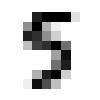
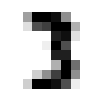
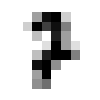
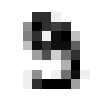
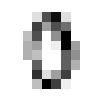
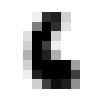
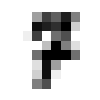
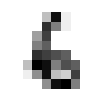
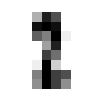
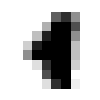
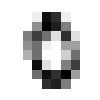
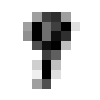
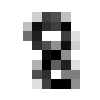
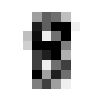
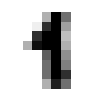
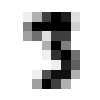
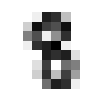
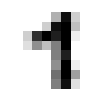
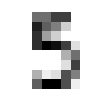
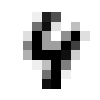
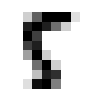
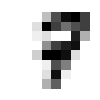
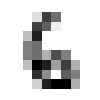
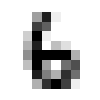
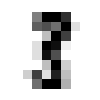
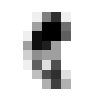
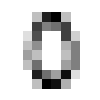
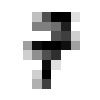
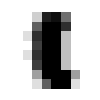
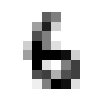
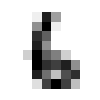
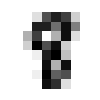
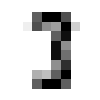
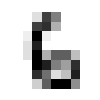
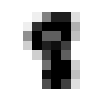
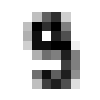
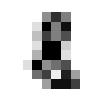
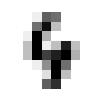
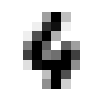
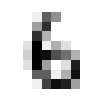
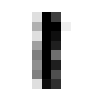
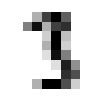
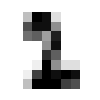
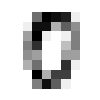
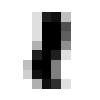
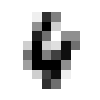
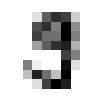
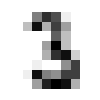
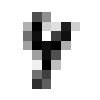
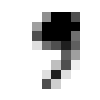
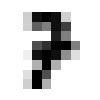
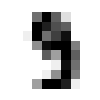
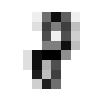
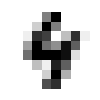
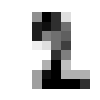
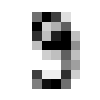
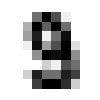
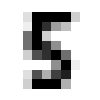
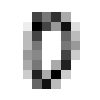
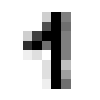
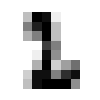
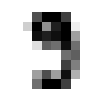
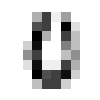
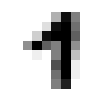
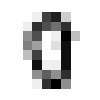
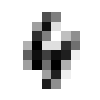
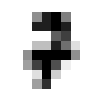
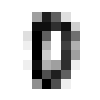
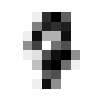
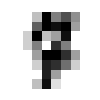
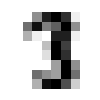
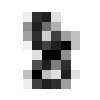
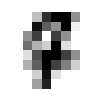
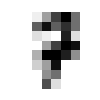
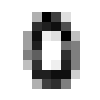
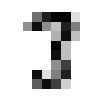
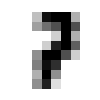
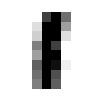
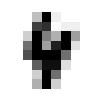
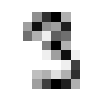
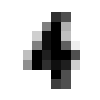
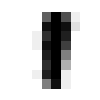
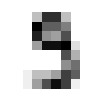
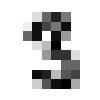
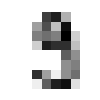
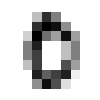
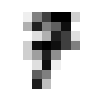
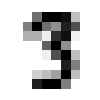
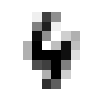
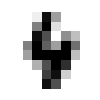
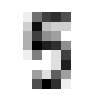
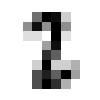
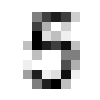
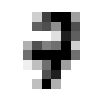
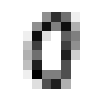
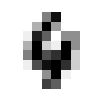
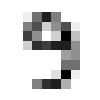
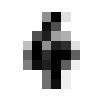
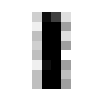
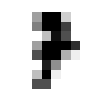
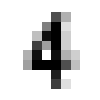
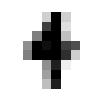
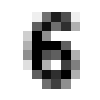
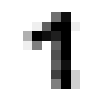
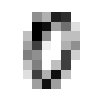
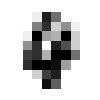
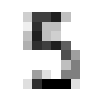
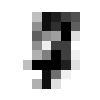
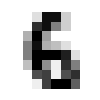
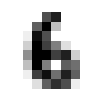
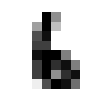
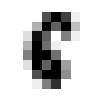
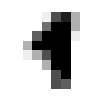
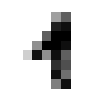
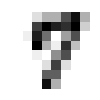
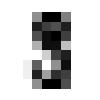
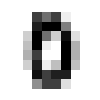
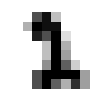
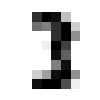
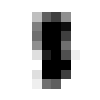
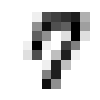
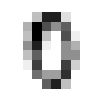
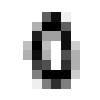
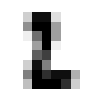
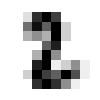
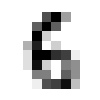
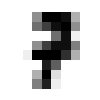
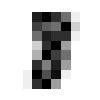
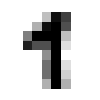
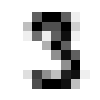
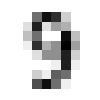
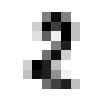
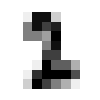
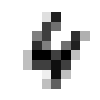
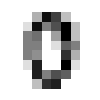
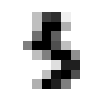
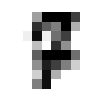
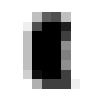
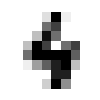
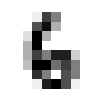
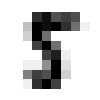
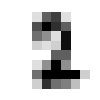
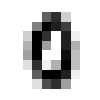
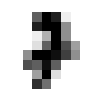
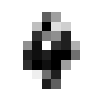
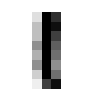
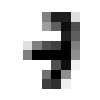
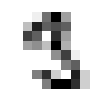
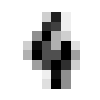
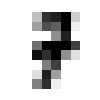
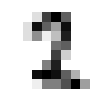
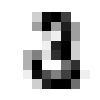
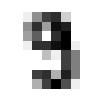
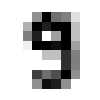
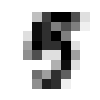
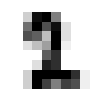
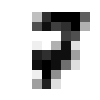
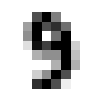
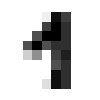
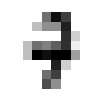
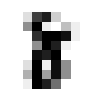
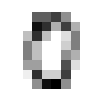
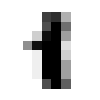
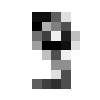
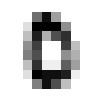
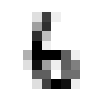
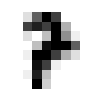
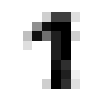
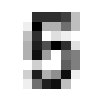
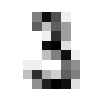
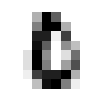
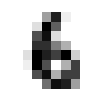
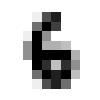
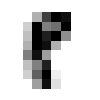
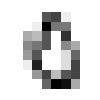
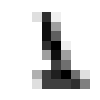
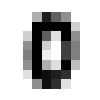
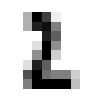
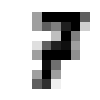
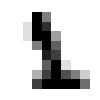
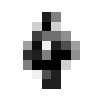
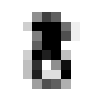
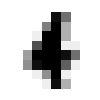
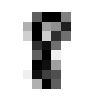
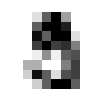
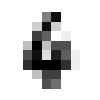
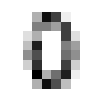
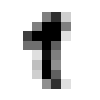
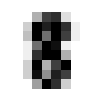
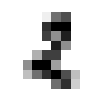
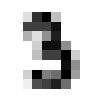
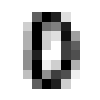
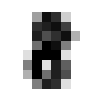
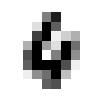
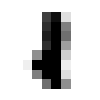
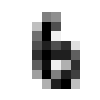
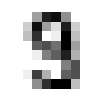
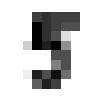
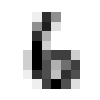
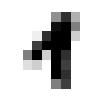
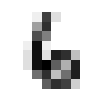
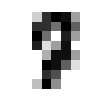
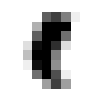
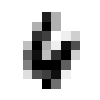
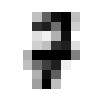
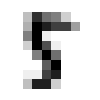
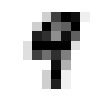
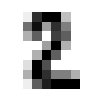
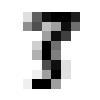
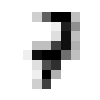
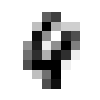
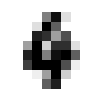
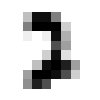
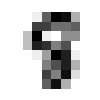
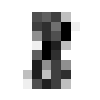
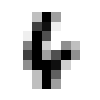
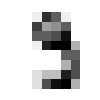
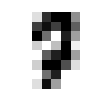
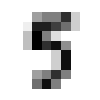
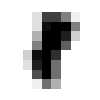
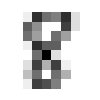
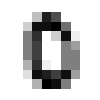
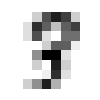
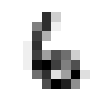
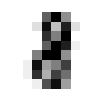
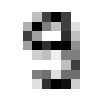
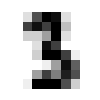
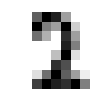
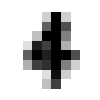
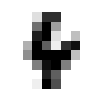
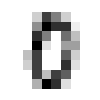
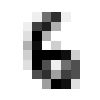
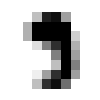
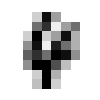
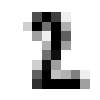
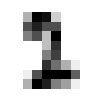
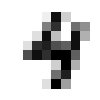
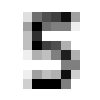
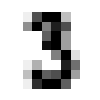
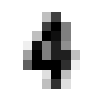
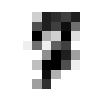
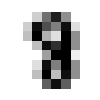
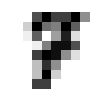
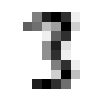
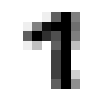
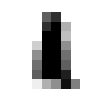
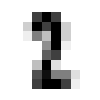
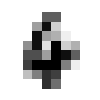
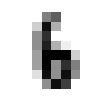
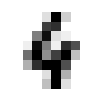
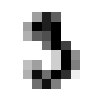
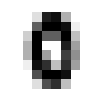
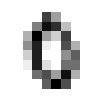
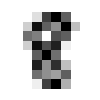
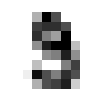
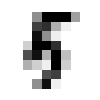
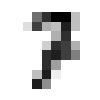
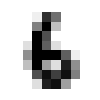
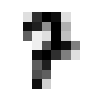
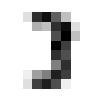
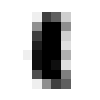
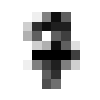
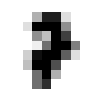
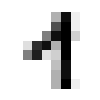
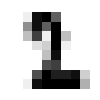
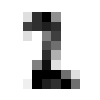
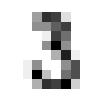
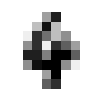
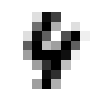
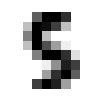
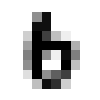
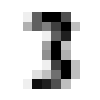
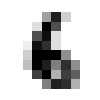
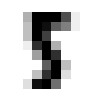
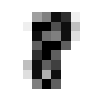
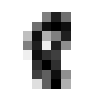
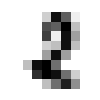
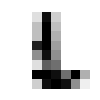
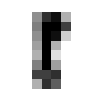
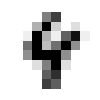
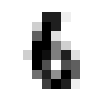
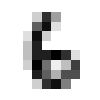
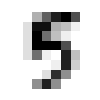
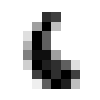
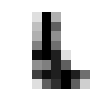
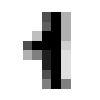
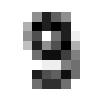
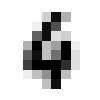
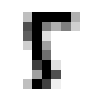
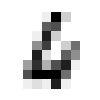
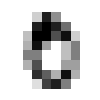
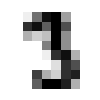
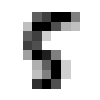
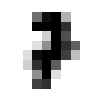
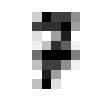
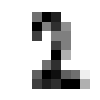
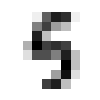
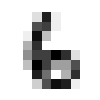
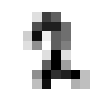
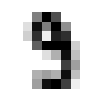
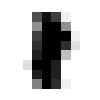
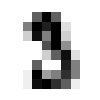
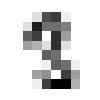
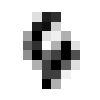
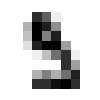
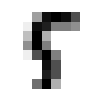
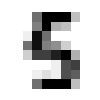
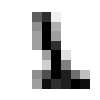
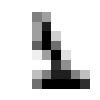
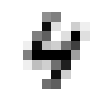
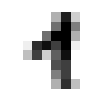
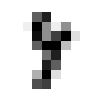
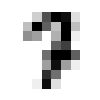
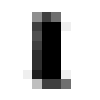
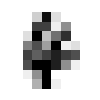
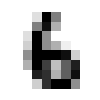
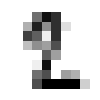
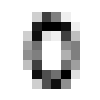
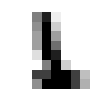
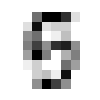
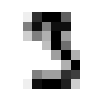
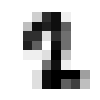
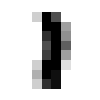
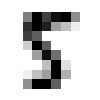
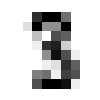
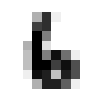
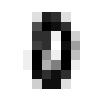
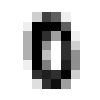
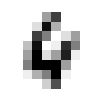
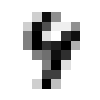
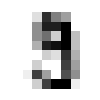
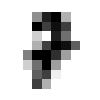
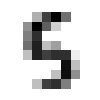
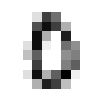
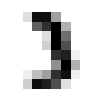
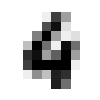
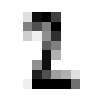
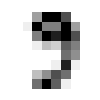
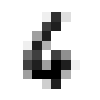
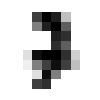
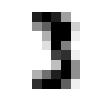
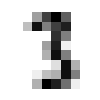
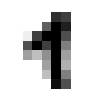
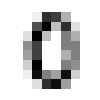
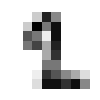
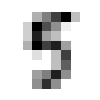
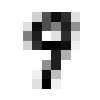
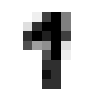
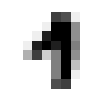
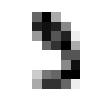
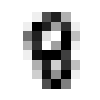
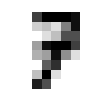
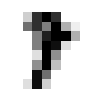
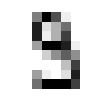
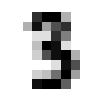
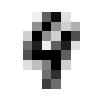
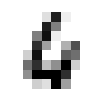
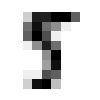
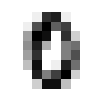
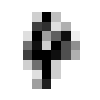
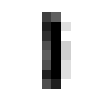
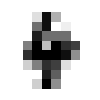
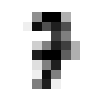
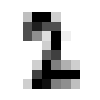
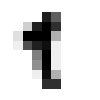
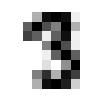
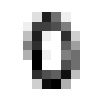
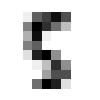
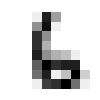
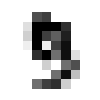
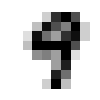
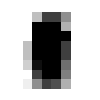
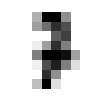
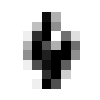
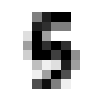
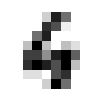
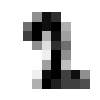
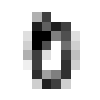
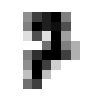
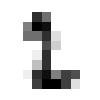
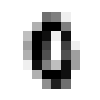
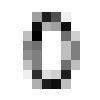
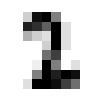
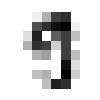
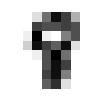
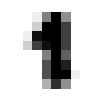
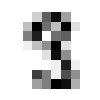
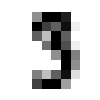
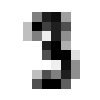
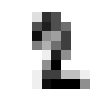
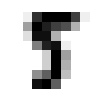
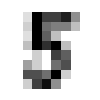
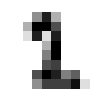
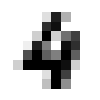
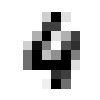
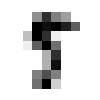
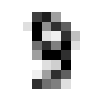
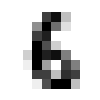
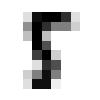
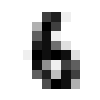
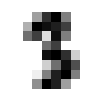
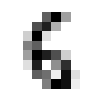
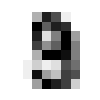
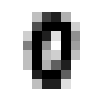
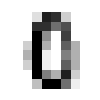
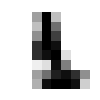
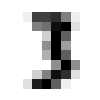
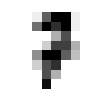
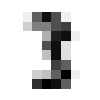
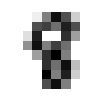
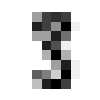
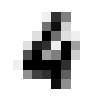
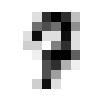
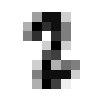
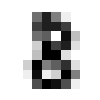
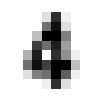
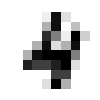
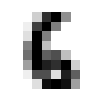
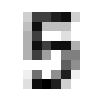
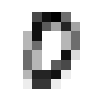
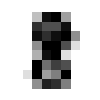
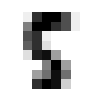
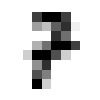
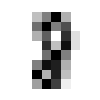
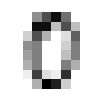
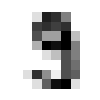
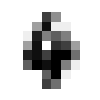
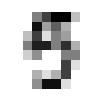
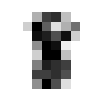
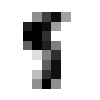
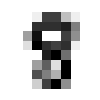
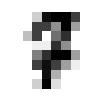
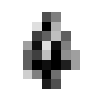
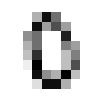
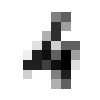
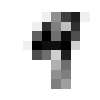
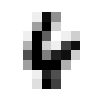
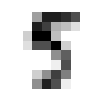
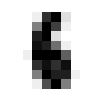
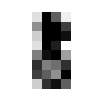
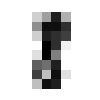
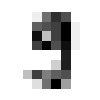
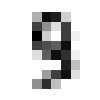
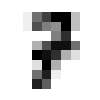
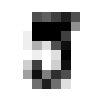
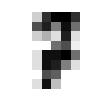
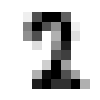
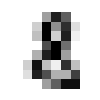
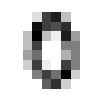
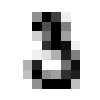
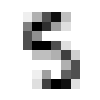
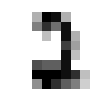
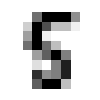
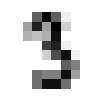
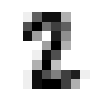
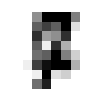
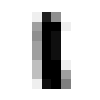
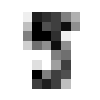
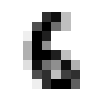
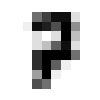
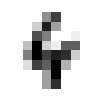
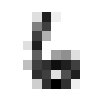
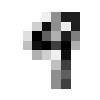
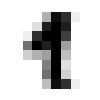
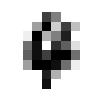
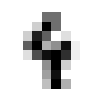
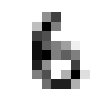
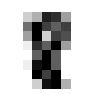
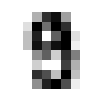
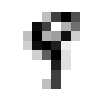
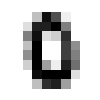
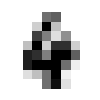
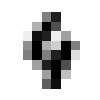
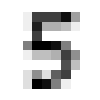
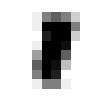
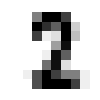
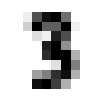
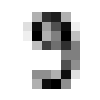
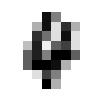
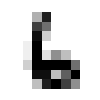
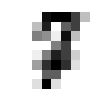
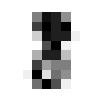
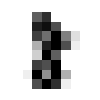
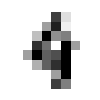
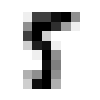
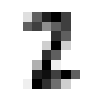
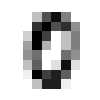
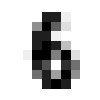
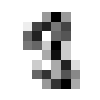
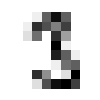
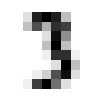
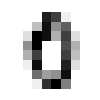
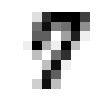
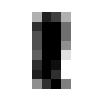
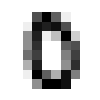
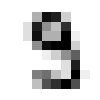
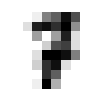
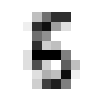
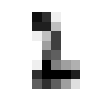
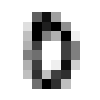
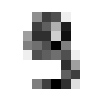
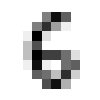
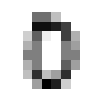
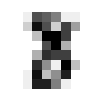
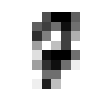
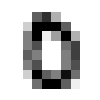
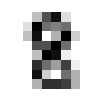
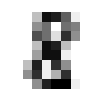
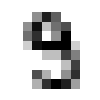
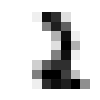
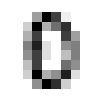
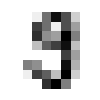
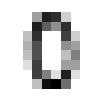
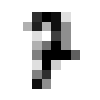
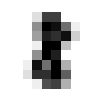
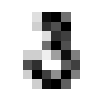
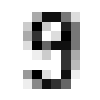
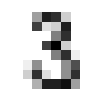
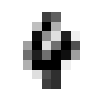
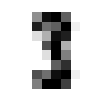
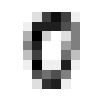
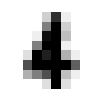
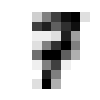
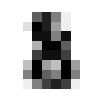
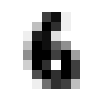
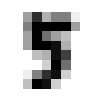
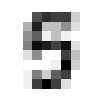
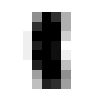
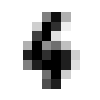
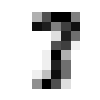
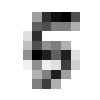
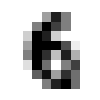
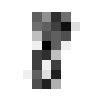
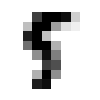
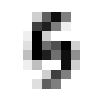
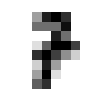
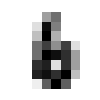
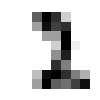
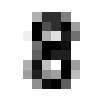
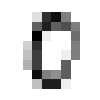
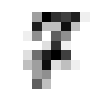
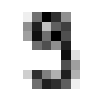
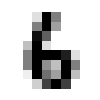
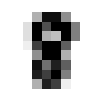
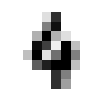
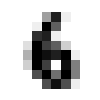
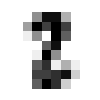
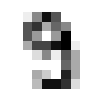
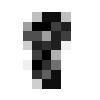
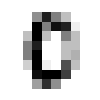
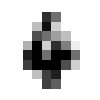
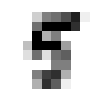
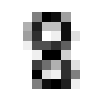
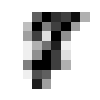
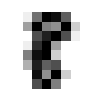
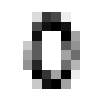
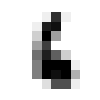
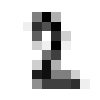
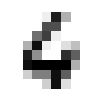
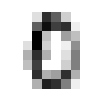
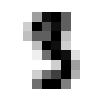
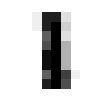
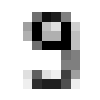
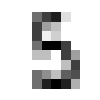
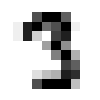
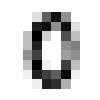
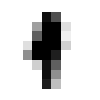
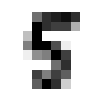
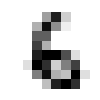
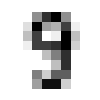
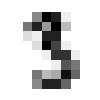
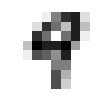
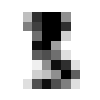
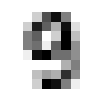
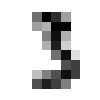
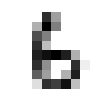
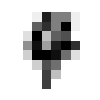
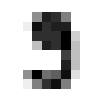
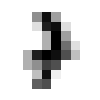
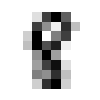
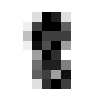
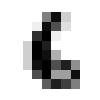
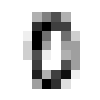
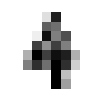
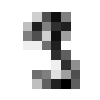
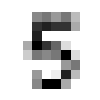
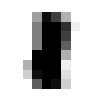
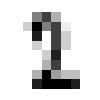
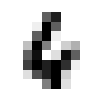
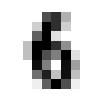
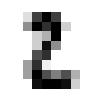
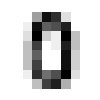
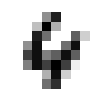
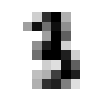
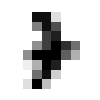
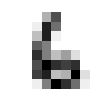
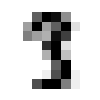
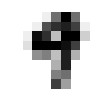
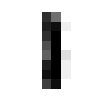
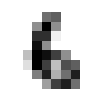
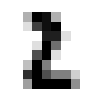
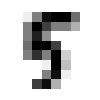
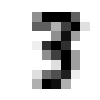
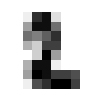
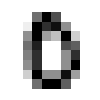
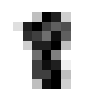
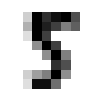
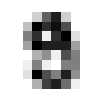
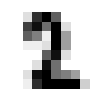
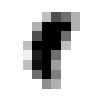
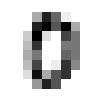
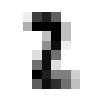
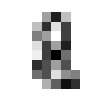
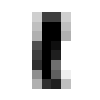
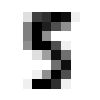
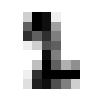
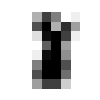
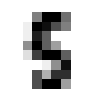
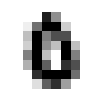
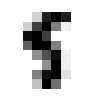
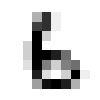
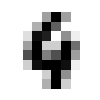
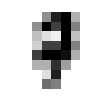
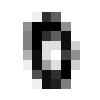
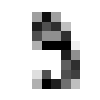
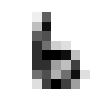
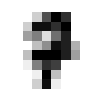
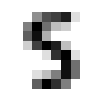
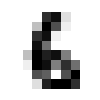
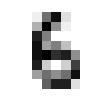
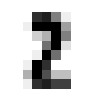
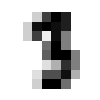
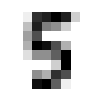
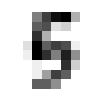
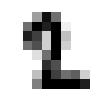
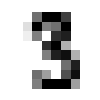
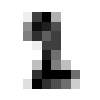
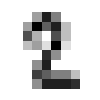
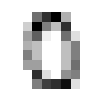
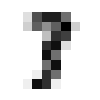
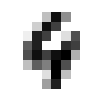
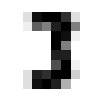
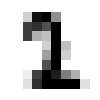
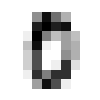
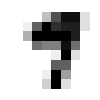
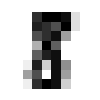
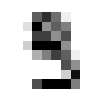
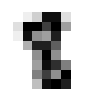
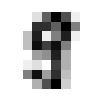
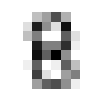
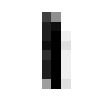
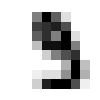
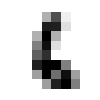
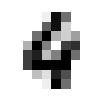
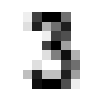
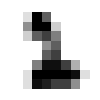
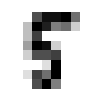
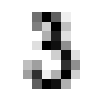
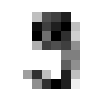
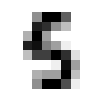
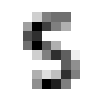
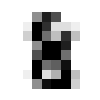
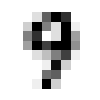
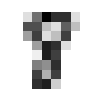
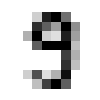
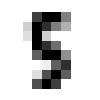
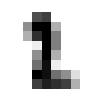
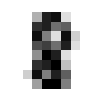
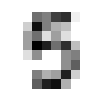
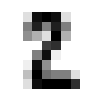
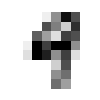
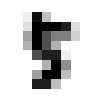
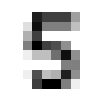
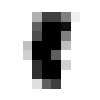
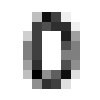
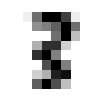
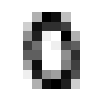
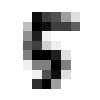
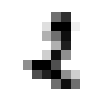
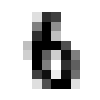
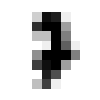
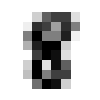
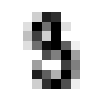
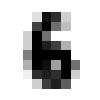
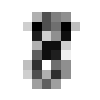
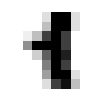
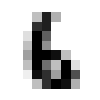
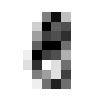
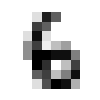
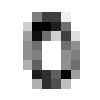
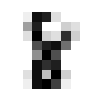
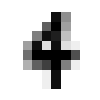
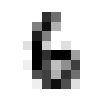
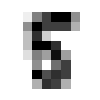
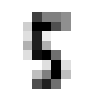
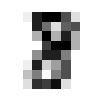
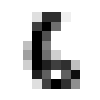
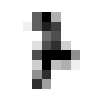
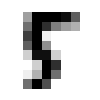
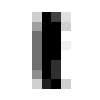
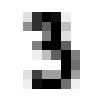
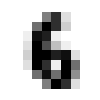
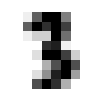
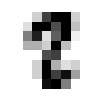
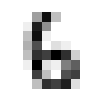
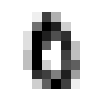
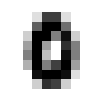
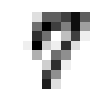
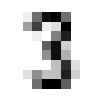
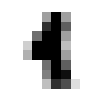
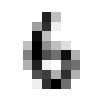
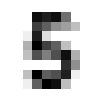
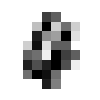
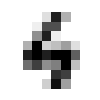
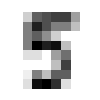
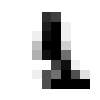
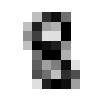
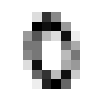
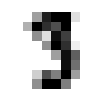
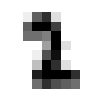
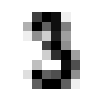
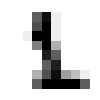
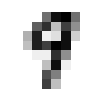
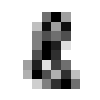
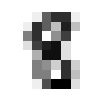
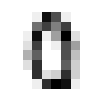
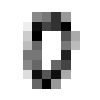
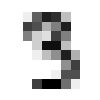
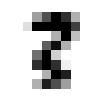
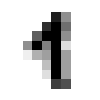
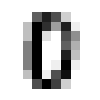
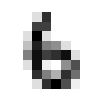
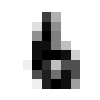
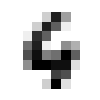
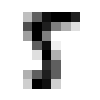
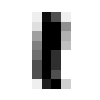
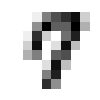
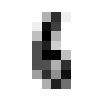
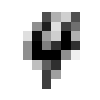
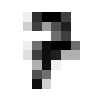
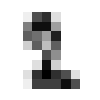
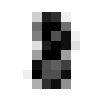
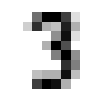
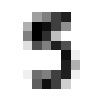
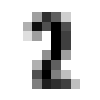
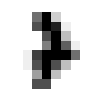
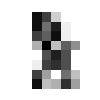
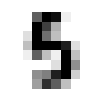
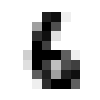
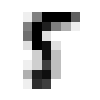
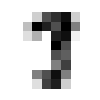
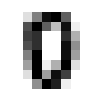
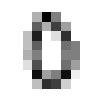
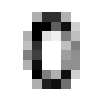
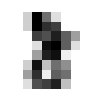
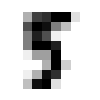
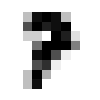
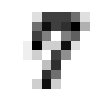
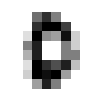
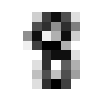
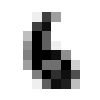
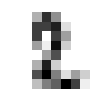
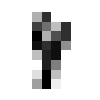
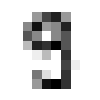
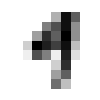
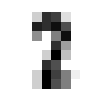
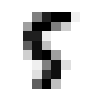
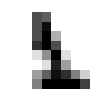
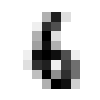
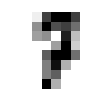
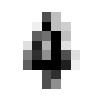
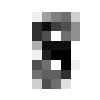
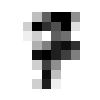
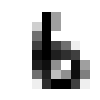
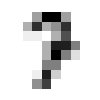
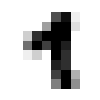
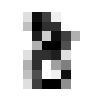
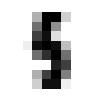
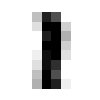
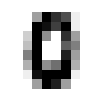
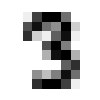
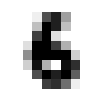
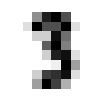
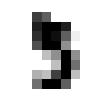
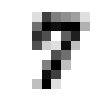
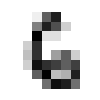
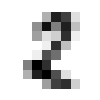
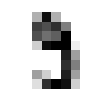
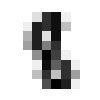
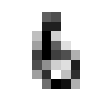
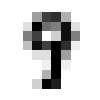
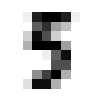
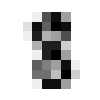
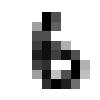
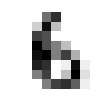
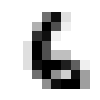
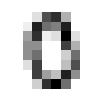
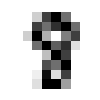
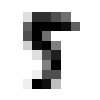
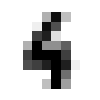
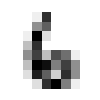
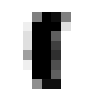
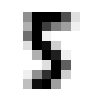
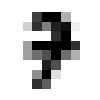
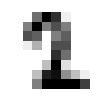
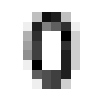
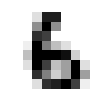
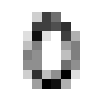
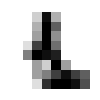
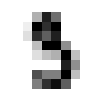
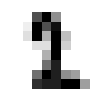
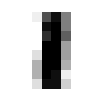
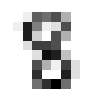
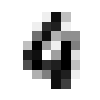
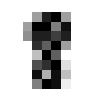
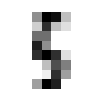
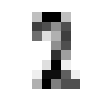
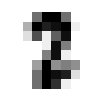
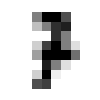
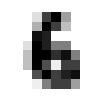
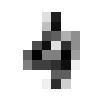
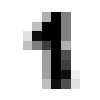
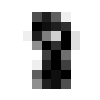
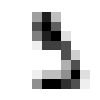
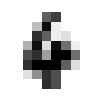
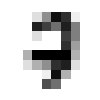
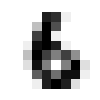
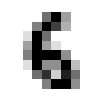
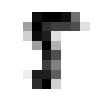
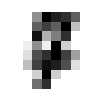
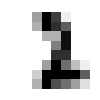
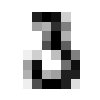
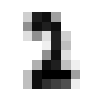
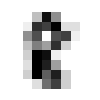
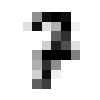
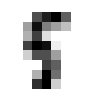
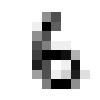
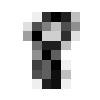
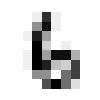
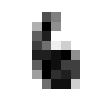
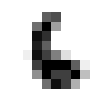
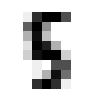
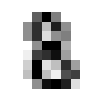
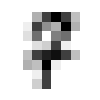
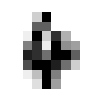
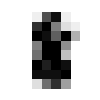
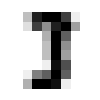
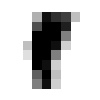
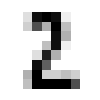
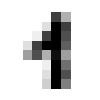
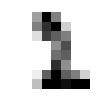
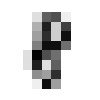
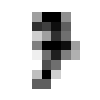
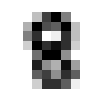
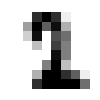
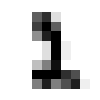
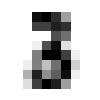
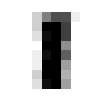
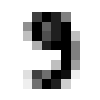
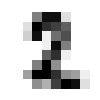
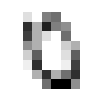
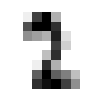
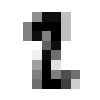
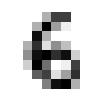
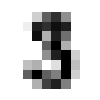
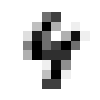
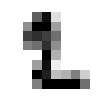
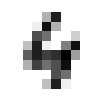
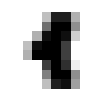
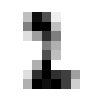
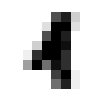
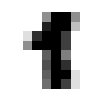
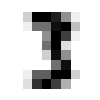
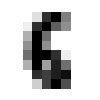
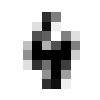
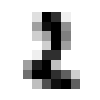
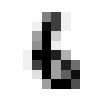
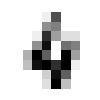
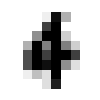
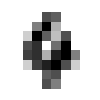
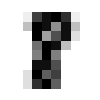
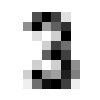
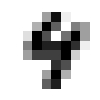
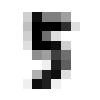
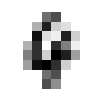
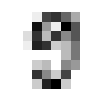
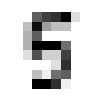
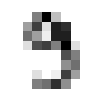
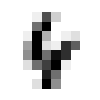
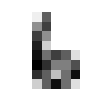
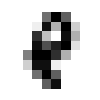
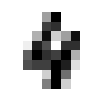
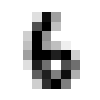
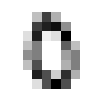
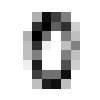
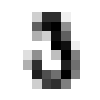
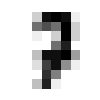
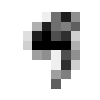
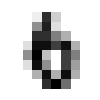
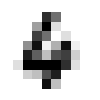
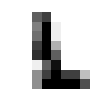
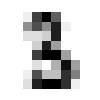
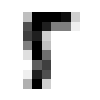
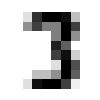
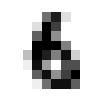
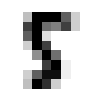
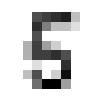
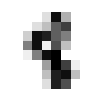
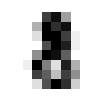
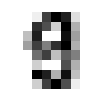
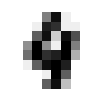
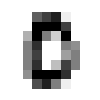
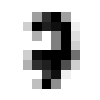
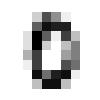
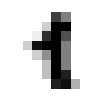
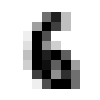
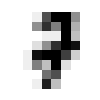
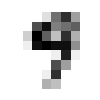
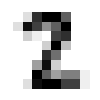
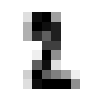
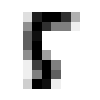
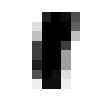
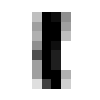
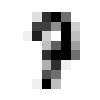
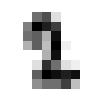
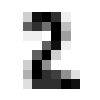
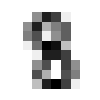
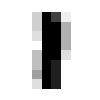
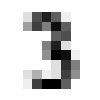
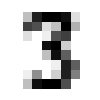
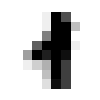
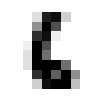
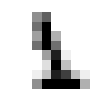
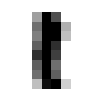
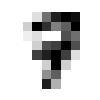
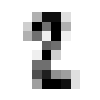
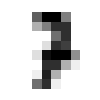
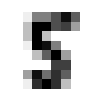
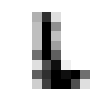
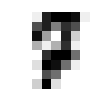
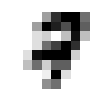
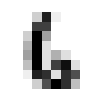
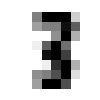
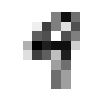
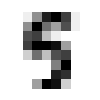
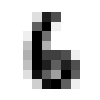
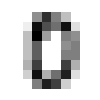
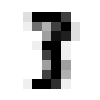
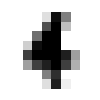
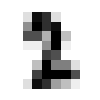
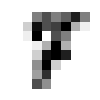
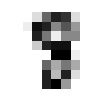
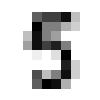
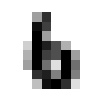
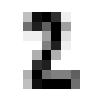
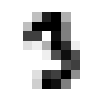
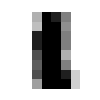
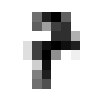
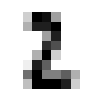
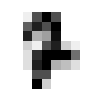
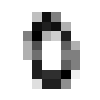
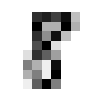
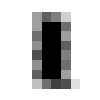
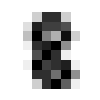
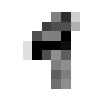
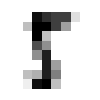
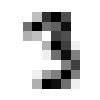
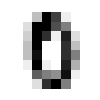
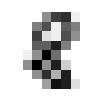
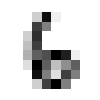
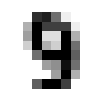
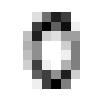
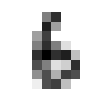
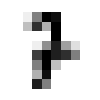

In [24]:
# RENDER THE DATAFRAME AS HTML
HTML(df[['image_html','label']].to_html(escape=False))

Despite the effort to achieve what is presented in the previous cell, the training for the models must be done with $X$ and $y$ since the models do not understand images as such, at least not the models that have been worked with regression and classification so far.

However, this effort allows us to visualize what the images we worked with look like and at the same time show that they are correctly labeled, since with $X$ and $y$ it is not possible to see it as easily as now.